# Introduction to _Quality Attenutation_

Today's marketing culture often tries to sell you on the basis you are getting 'more' _Quality_, 
however in many systems it is not about _adding_ quality, but getting control over the 
loss of something.

This is true if you want silence (it is the _absence_ of noise); dark (the _absence_ of light);
low-stress travel (the _absence_ of hassle, delays etc.). 

Often, what is being valued is the absence of 'badness', and this underlies the mindset we
are taking in this approach.

## Simple example

Consider a journey to the convience store to pick up a sandwich and then journey to work.

$$\text{home} \rightarrow \text{shop} \rightarrow \text{work}$$

let's assume (for the moment) that, because you are a regular and estemed customer,
the shop always has your order ready and you don't have to delay there - it is
just a waypoint that services you, without fail, 'instantaneously';

How long does your journey to work take?


Let's say that the shop is $3$ minutes away and work $20$ minutes further. We will, again for
the moment, assume that it always takes _exactly the same_ time every time you make that journey.

How could this journey be measured? You, as a sentient human (at least to some extent when heading
to work), could carry a stopwatch and could record your times by starting the watch when
you leave home, get a split time as you pass the shop (picking up your lunch) and stop the
timer as you enter work. 
This would work, but it is all dependent on your stop watch and your ability to rember 
to record, etc.
Imagine you wanted to record the time to get to work (while passing via shop on the way)
for lots of people, there is an inherent complexity about supplying all those stopwatches
and making sure that all the measurements were made properly.

Consider a different way of framing such measurements; imagine an _observer_ who can record the 
time as you pass certain key locations such as:
- leaving the house
- passing the shop
- arriving at work

Such an observer can note (with their clock) both the wall clock time; the journey time (and its stages)
can be calculated by subtracing the appropate clock measurements. 
Such an observational framework is witnessing events, at locations, at given times. 
We are going to call these _observables_. 

The journey times becomes the difference between timed observables;
to help introduce our formalism we are going to give our observables 
short names like $a$, $b$, $c$ for home, shop, work respectively.

Given we've laid out the initial elements of a measurement approach we are going to 
change our focus slightly: the observables are important (they will come up later
as we lay down more details about how to use the framework), 
but our initial concern is with _outcomes_. 

The important property here is the outcome of arriving at work, 
given that you have left the house; 
$\textit{home}| \rightsquigarrow |\textit{work}$, or
$a| \rightsquigarrow |c$ where $a$ is the 'leaving home' 
and $c$ is the 'arriving at work' observables, respectively.

The starting observable $a|$ brings an expectation that the terminating observable $|c$ will be recorded.
The nature of this expecation is, as we will see, not just about arriving at work but also the time 
taken.

The interest here is in the _quality attenutation_ (or degradation) that is 
experienced during the outcome, namely:
$$\Delta Q^{a|\rightsquigarrow|c}$$

In thinking about this outcome, we are considering _all the times_ that outcome could occur. 
A single instance of the outcome would correspond to a particular day's journey, 
but we are going to widen our concern to more general statistical properties.

In [ ]:
import Control.Applicative (liftA2)
import Data.GraphViz.Printing (dot)
-- set up for the upcoming computations
import DeltaQ
-- needed for visualisation within iHaskell
import Graphics.Rendering.Chart.Renderable
-- useful for rendering Rationals with 'just enough' precision
asFloat :: Rational -> Float
asFloat = fromRational

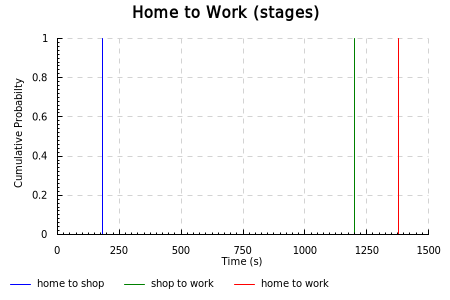

In [ ]:
homeToWork_1 :: [(String, DQ)]
homeToWork_1 
  = [ ("home to shop", h2s) 
    , ("shop to work", s2w)
    , ("home to work", h2s .>>. s2w)
    ]
  where
    h2s = wait $ 3 * 60  -- use  SI units
    s2w = wait $ 60 * 20

toRenderable $ 
   plotCDFs "Home to Work (stages)" 
            homeToWork_1

## Introducing variabilty

What we are illustating above is the $\Delta Q$ deduced from the point of the view of the observer, 
we are saying:

- Given you were observed leaving home you will be observed at the shop in $3$ minutes
  _without fail_. 
- Given you were observed at the shop you will be observed arriving at work $20$ minutes later,
   _without fail_.

And from that we are deducing (by 'adding' the two $\Delta Q$s) that,
having been observed leaving the house you will be observed
arriving at work $23$ minutes later again, without fail.
What we are illustrating is the _cummulative distribution function_ of the outcome,
capturing the relationship between the appropriate observables.

At this point it seems fairly simple - clearly the journey time is the sum of the two consituent parts.
Note we are not actually using '$+$' here, we are sequentially composing two things - it is just that,
in this simple case, they are equivalent.

We now want to allow for some variablity - the journey to the shop might require you to cross roads,
wait for traffic lights, say hello to neighbours, pet a local cat, etc. 
There is a possiblity that, having left _home_ you never arrive at _work_ - 
we won't dwell on why, but we are going to admit that possiblity. 

> Side Note: There is an interesting issue relating to how mathematicians will
> often use anthropomorphic examples (such as above) to illustrate their thinking. 
> The literature is littered with people in Post Office queues, drunks roaming
> around etc..
> This gives them a slight dilemma when they start to consider concepts such
> as 'erasure', 'failure', 'loss' etc. Mathematicians are, typically, moral and ethical
> and they have tended to shy away from such formulations.
> The upshot of this is that there is very little exploration been done into such variations.
> For the record we like humans and don't want them 'erased' - we also realise that real
> systems have these sort of issues everywhere and they need to be included in any modelling.
> So we ask you to please forgive us, we used an anthrpomophic example just to engage you, honestly.

Now we can start to refine the model to make it more 'realistic'.
We'll start with interactions related to the shop, we initially stated that the interaction 
with the shop never failed and was instanteous - its $\Delta Q$ was _perfection_. 

We'll consider $\Delta Q^{|\stackrel{\rightsquigarrow}{b}|}$ - 
where $|\stackrel{\rightsquigarrow}{b}|$ is the outcome arising from 
observing the arrival and departure at the shop.


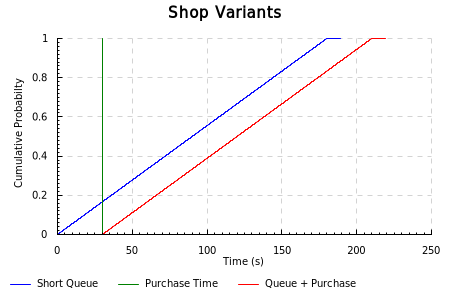

In [ ]:
shopVariants_1 :: [(String, DQ)]
shopVariants_1 = [
    ("Short Queue", queueWait),
    ("Purchase Time", service), 
    ("Queue + Purchase", queueWait .>>. service)
  ]
  where 
    queueWait = uniform 0 (3 * 60)
    service   = wait 30
    
toRenderable $ plotCDFs "Shop Variants" 
    shopVariants_1  

What we have captured here is that:
  1) It always takes 30 seconds to get served, but
  2) can take a uniform distribution of between 0 and 3 minutes to get to the head of the queue.

So, what happens to our model of our journey to work in these circumstances?

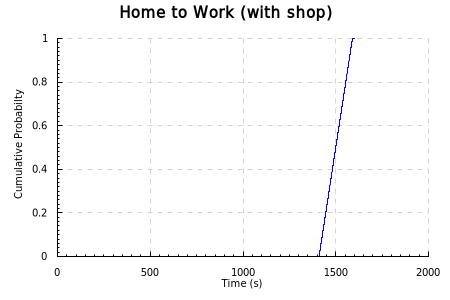

In [4]:
journey :: DQ
journey = h2s .>>. s2s .>>. s2w
  where
    h2s = wait $ 3 * 60
    s2w = wait $ 20 * 60
    s2s = uniform 0 (3 * 60) 
            .>>. wait 30
toRenderable 
    $ plotCDF 
      "Home to Work (with shop)"
      journey

In [5]:
-- The earliest you will arrive at work
lwb = earliest journey
putStrLn $ "earliest arrival - " ++ show (asFloat <$> lwb)

-- The latest you will arrive at work
upb = deadline journey
putStrLn $ "latest arrival - " ++ show (asFloat <$> upb)

-- Range of arrival times
putStrLn $ "range of variablity in arrival - " ++  show (asFloat <$> liftA2 subtract lwb upb)

earliest arrival - Occurs 1410.0

latest arrival - Occurs 1590.0

range of variablity in arrival - Occurs 180.0

## introducing abandonment

In what we have captured so far, once you set off for work then you _will_ get there. 
Life is never quite that certain, there are many potential reasons why you might not arrive.

The notion of 'non-arrival' can be used to capture the occurance of many possible phenomena, 
some are things you would rather not think of, some might be more pleasant.

For the purposes of illustration we are _not_ going to consider that crossing the road is 
potentially hazardous and if that hazard matures you would not end up in work that day -
in a more thorough analysis this could be included, it is a 'credidible worst case scenario'.
Similarly, there are far more unlikely hazards, intense gamma-rays from solar system core 
wipe out life just as you are walking to work - we will treat this as not credible, it is 
not to say that we could not quantify it, but that it represents a scenario is which no one would care about this outcome anymore.

What we will consider is something more potentially pleasant, that allthough it represents 
a hazard to the journey to work - and that's what we will calculate it would not be considered
a worst case scenario.

Imagine that, during the journey between work and office there is a park, when
crossing this park there is the possibility your path crossing with an individual
that you interact with.

When this interaction occurs it introduces some variance along that 
section of your journey also, that during this interaction there is a 
possibility that individual offers you an alternative to work that day 
(what that is, I leave to the reader's imagination - think of something pleasant) 
that means you never complete this journey to work. 

The description of the sub-outcomes has changed, it has gone from 

$$\text{home} \rightarrow \text{shop} \rightarrow \text{work}$$

to

$$\text{home} \rightarrow \text{shop} \rightarrow \fbox{traverse park} \rightarrow \text{work}$$

Traversing that park takes time - say 5 minutes,
$\Delta Q^{|\stackrel{\rightsquigarrow}{park}|}$; 
and we are going to re-distribute remaining
$\Delta Q^{\textit{shop}| \rightsquigarrow |\textit{work}}$
into a before and after, say 5 minutes and 10 minutes respectively.

The $\Delta Q$ of our journey is now:

$$ \Delta Q^{\textit{home}| \rightsquigarrow |\textit{shop}} \oplus
   \Delta Q^{|\stackrel{\rightsquigarrow}{shop}|} \oplus
   \Delta Q^{\textit{shop}| \rightsquigarrow |\textit{park}} \oplus
   \Delta Q^{|\stackrel{\rightsquigarrow}{park}|} \oplus
   \Delta Q^{\textit{park}| \rightsquigarrow |\textit{work}}
$$

We have already described the likely outcomes for the $\textit{shop}$ outcome, 
now let us describe the $\textit{park}$ outcome. 

In [6]:
park meetProb dalliance skipProb
  = wait (5 * 60) .>>. 
    choice (1 - meetProb) 
        (wait 0)                   -- no ∆Q the 'perfect' outcome, no interaction cost
        (uniform 0 dalliance .>>.  -- the temporal cost of the interaction 
        choice skipProb
           never                   -- abandonment of journey
           (wait 0))

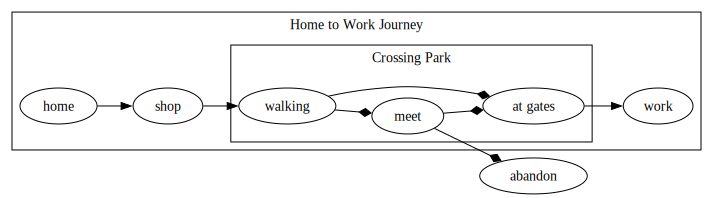

In [ ]:
dot $ unlines [
      "digraph {"
    , "rankdir=LR"
    , "subgraph cluster_journey {"
    , " label=\"Home to Work Journey\""
    , " home"
    , " shop"
    , " work"
    , "subgraph cluster_park {"
    , "  label=\"Crossing Park\""
    , "   p_in[label=\"walking\"]"
    , "   p_meet[label=\"meet\"]"
    , "   p_out[label=\"at gates\"]"
    , "  }"
    , "}"
    , "home -> shop"    
    , "shop -> p_in"
    , "p_in -> p_out,p_meet [arrowhead=diamond]"
    , "p_meet -> p_out [arrowhead=diamond]"
    , "p_meet -> abandon[arrowhead=diamond]"
    , "p_out -> work"
    , "}"
  ]


The figure above captures the general causality structure. 
It describes a whole range (in $\Delta Q\$ terms) of outcomes associated with crossing the park.
In a suitable execution environment we could introduce effects that influenced
the choices here; it raining might change the `meetProb`, the temperature might
influence the `dalliance` duration and some history of previous interactions (like
how many meetings had occured in the recent past) the `skipProb`.

The choice of those environmental factors, the strength of coupling with the various 
parameters are aspects that lie in the domain of 'subject matter experts'. 
Once quantified the framework evaluates the $\Delta Q$ consequences.


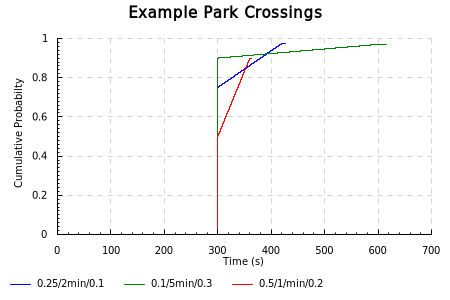

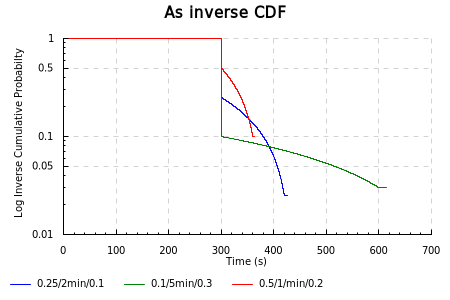

In [ ]:
parkExamples = [ ("0.25/2min/0.1", park 0.25 (2 * 60) 0.1 ::DQ)
               , ("0.1/5min/0.3", park 0.1 (5 * 60) 0.3)
               , ("0.5/1/min/0.2", park 0.5 (1 * 60) 0.2)
               ]
toRenderable $ plotCDFs "Example Park Crossings" parkExamples
toRenderable $ plotInverseCDFs "As inverse CDF" parkExamples

The use of an inverse CDF on a log probababilty scale helps focus in the variations in tail behaviour, 
in this case how much the variation influences time to get to work and how quickly that journey would be 
abandoned.

Again, relating this to the scenario into which subject matter expertise has been incorporated, 
such variations can be related back to the real world phenomena with which they are coupled.